In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
##### numpy.random.uniform(low=0.0, high=1.0, size=None)

# Draw samples from a uniform distribution.

# Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high). 
# In other words, any value within the given interval is equally likely to be drawn by uniform.

In [4]:
# 1/cm
mua = 10

# cm
delta_z = 0.025

# total photon number
photon_num = 10000

# cm
medium_thickness = 1

# Beer-Lambert Law function and generate data
def integrand(x):
    return mua*np.exp(-mua*x)
x_data = np.linspace(0.0125, 0.9875, num=40)
y_data = np.array([])
for step in range(40):
    y_data = np.append(y_data, photon_num * integrate.quad(integrand, step*delta_z, step*delta_z+delta_z)[0])

# running times
run_times = 5

id: 985, position: 0.835124113928399
id: 8766, position: 0.8754558509134757


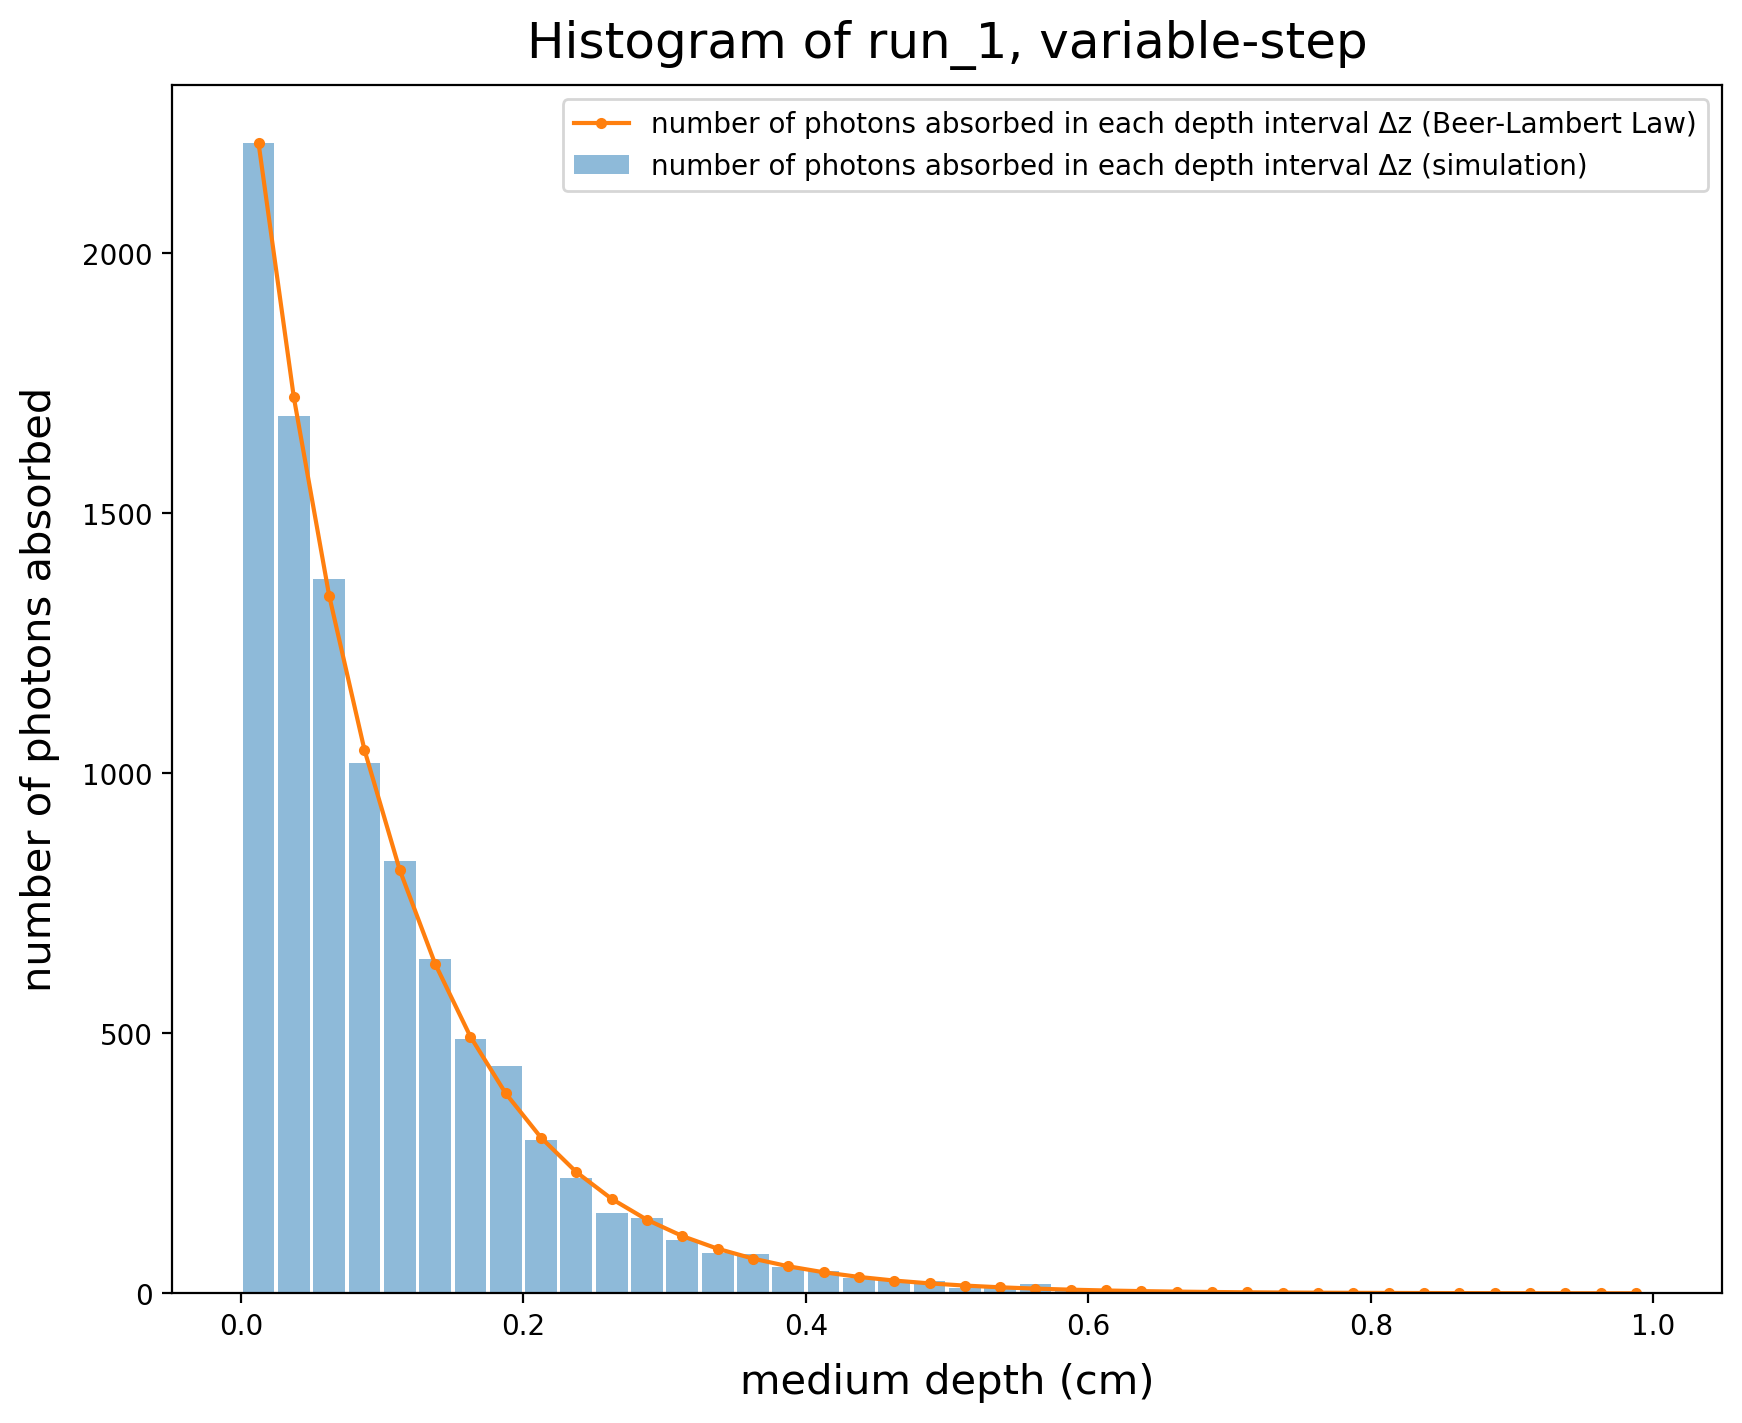

id: 5991, position: 0.8397009263367055


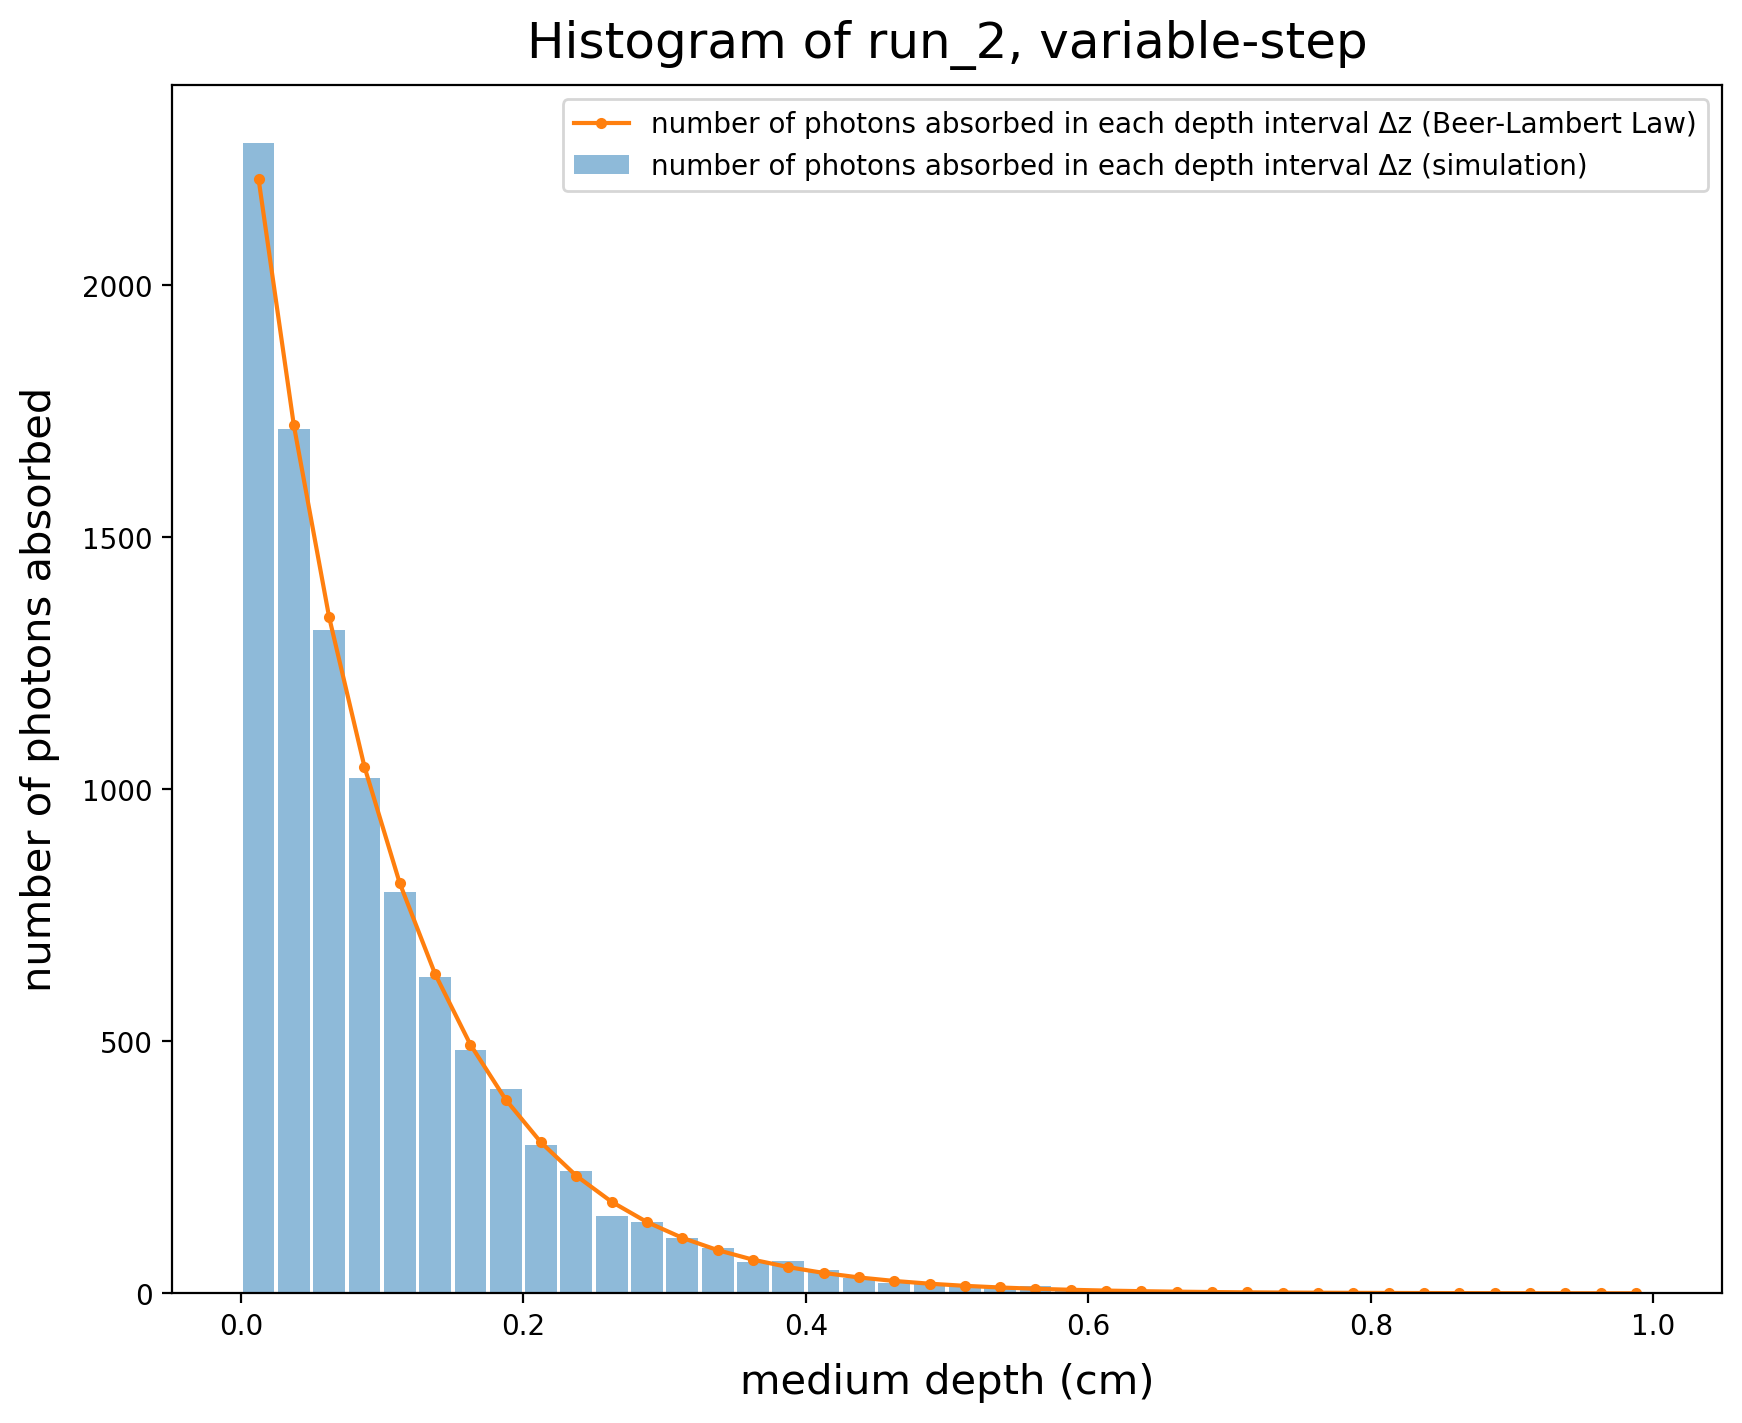

id: 641, position: 0.8770847168718658
id: 2961, position: 0.9177261378540889
id: 3021, position: 0.8354755207945782
id: 4805, position: 0.8440126652825288
id: 9823, position: 1.0654889409981227


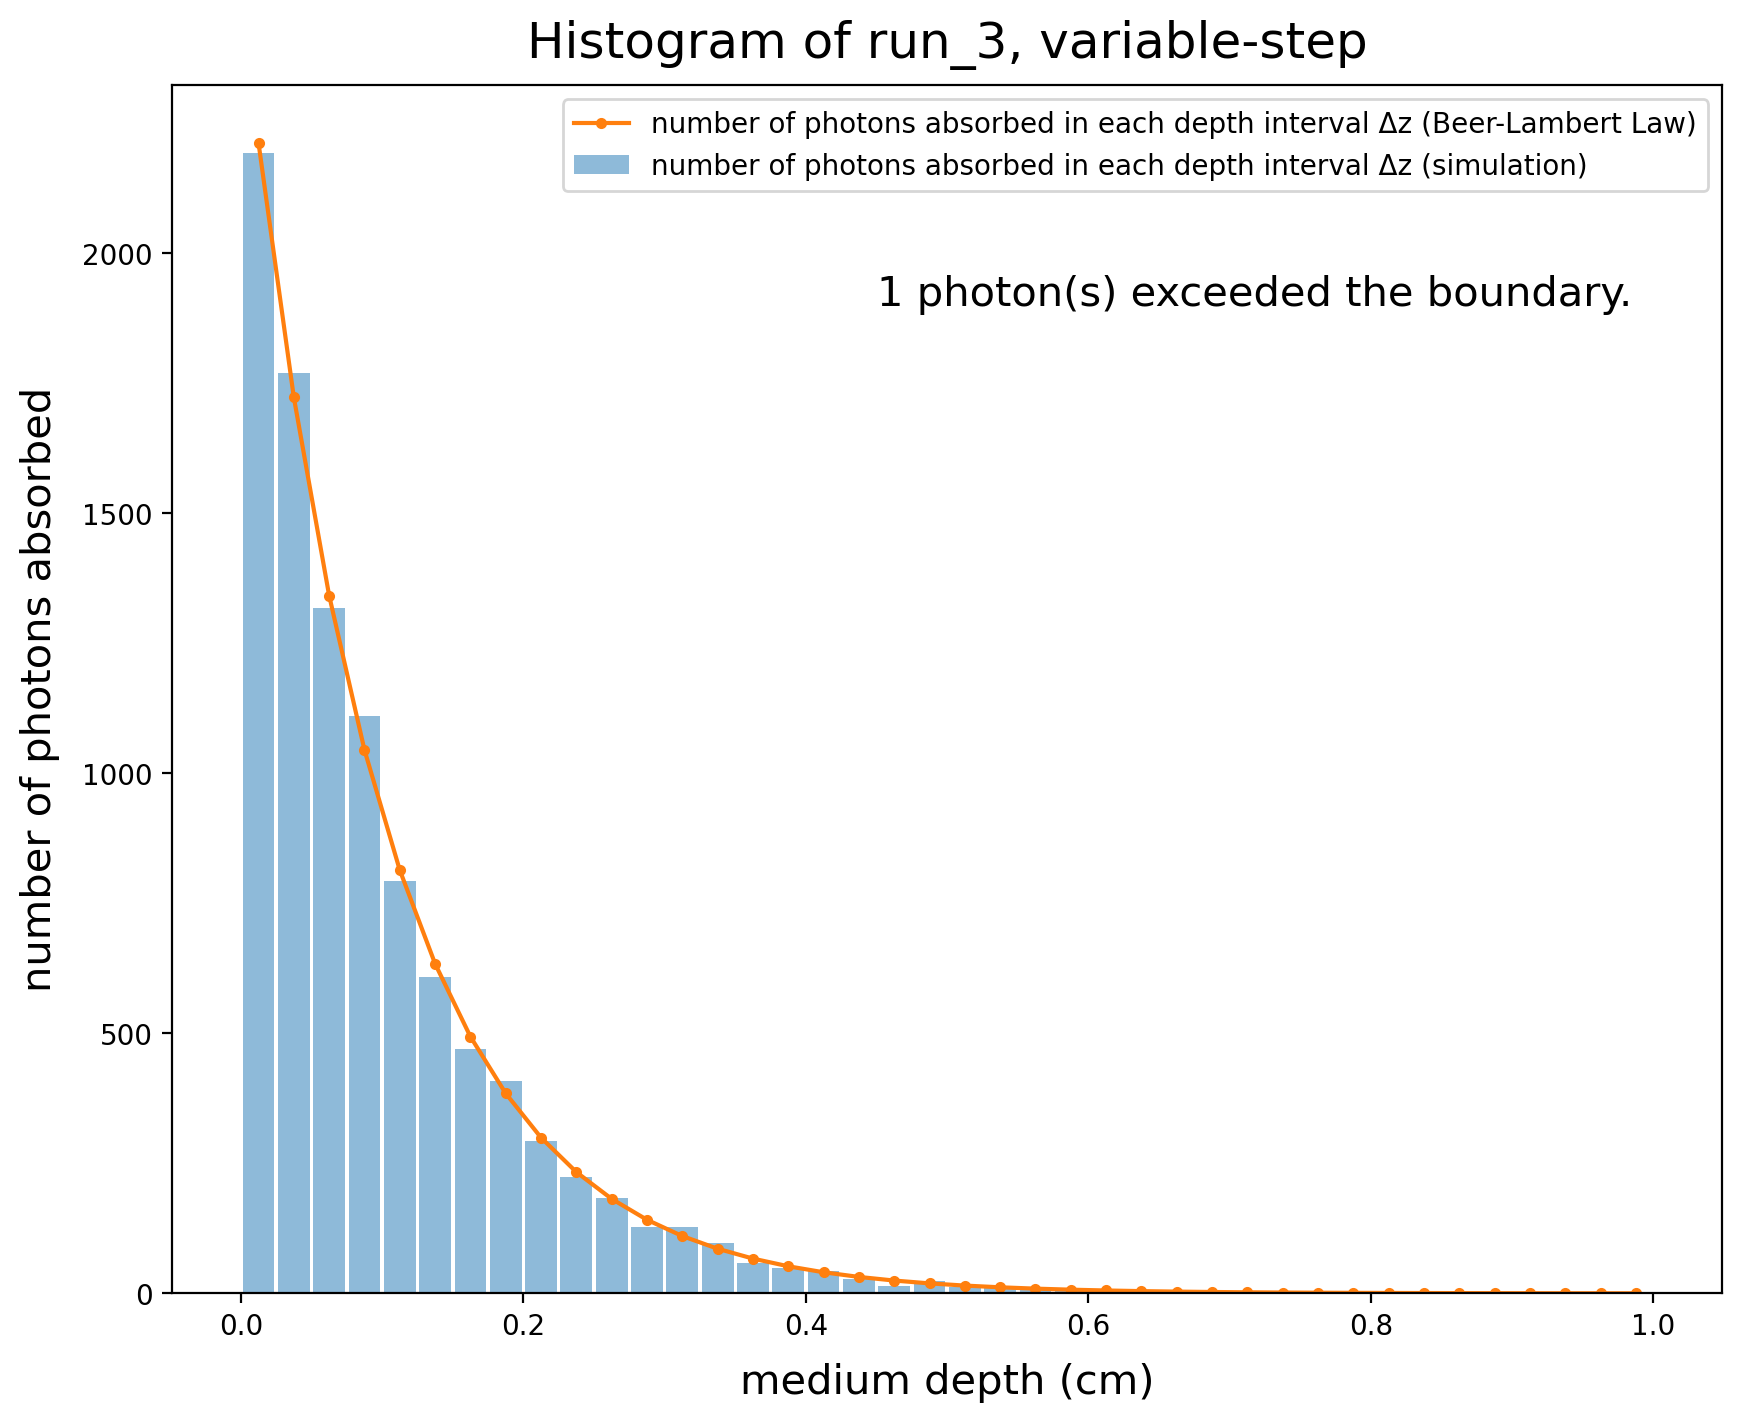

id: 4705, position: 0.8359431380452026


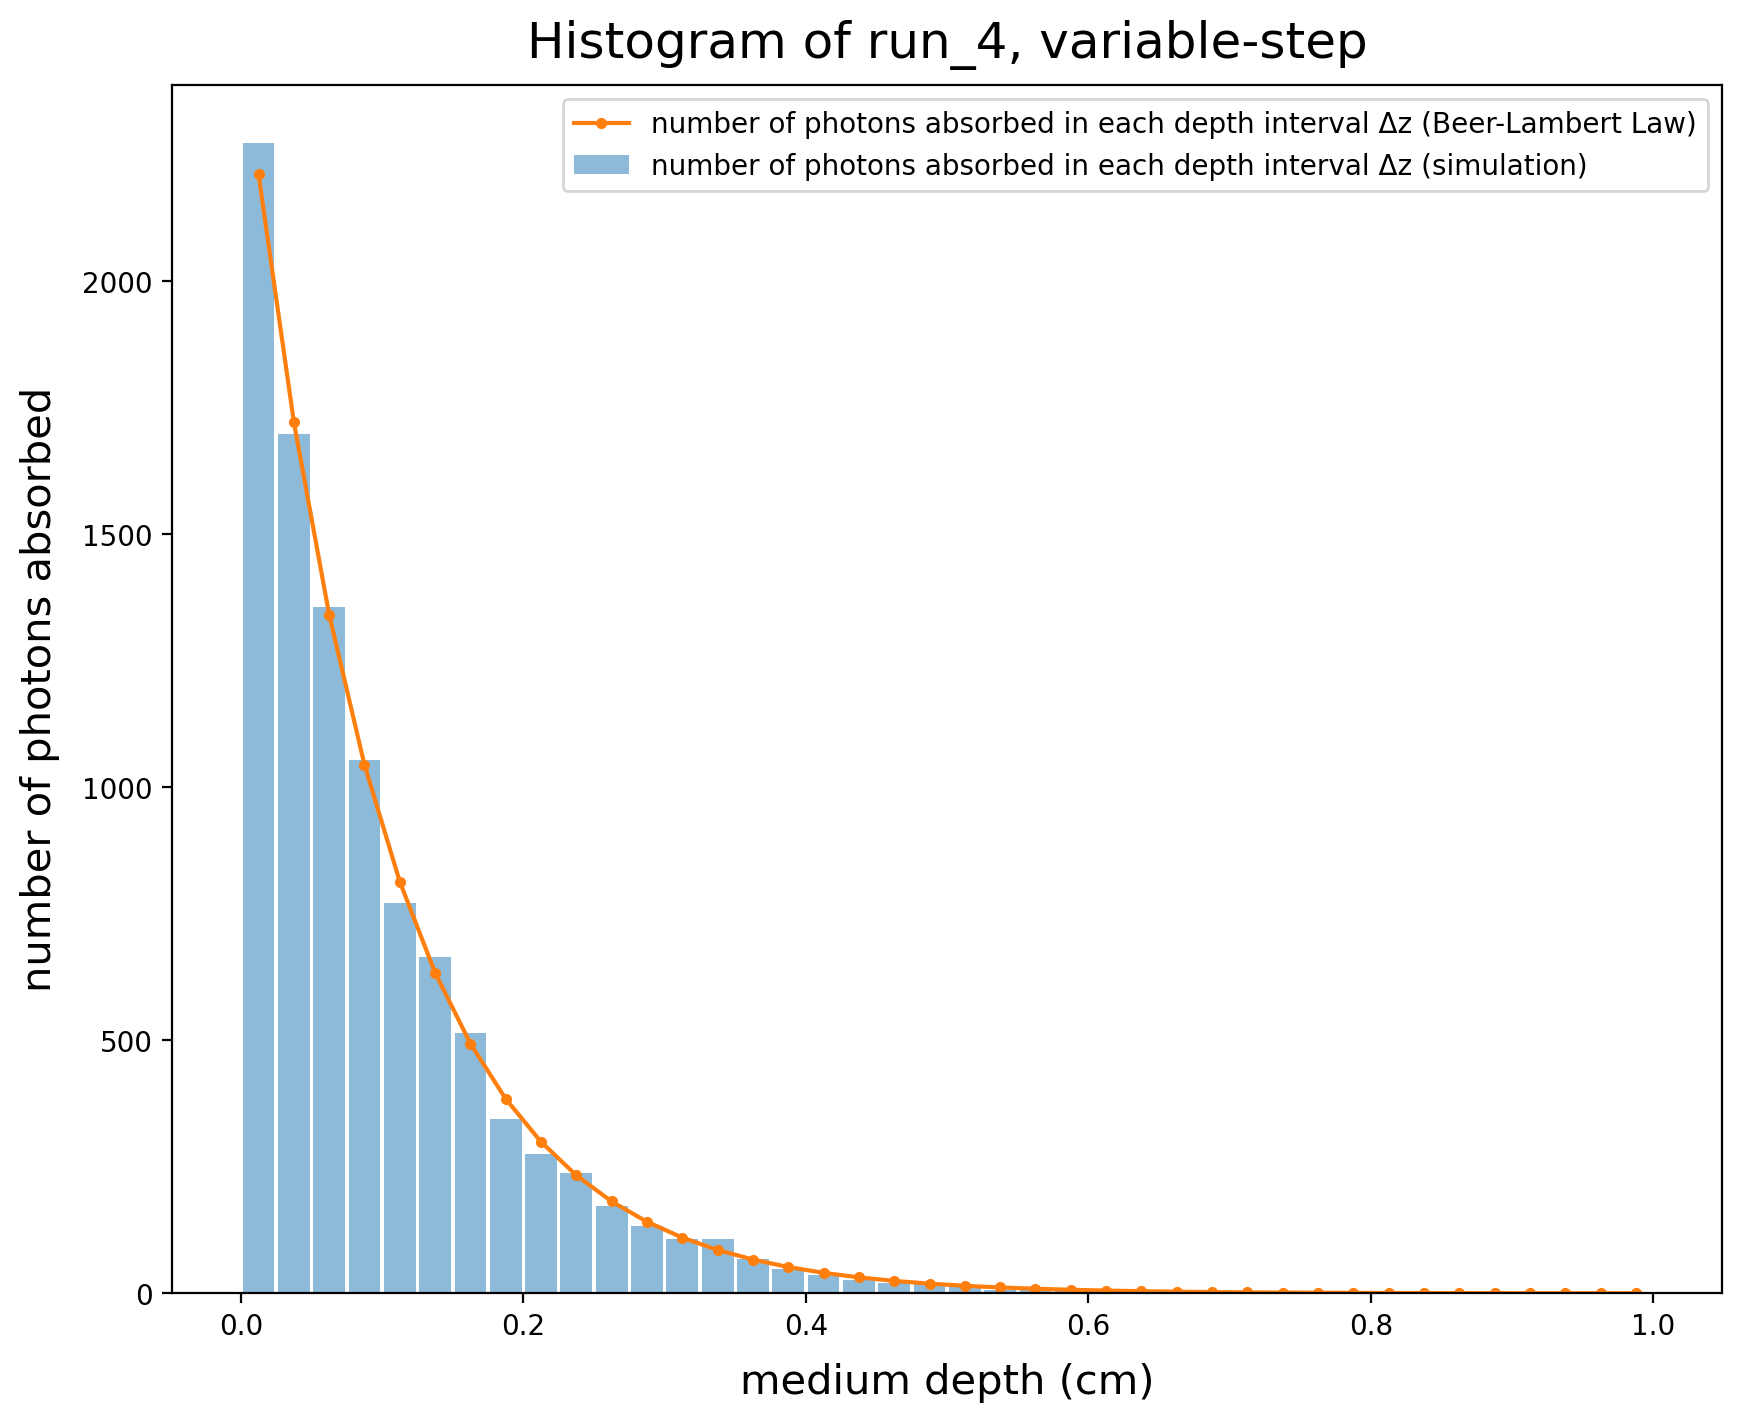

id: 4336, position: 0.8114697529273386


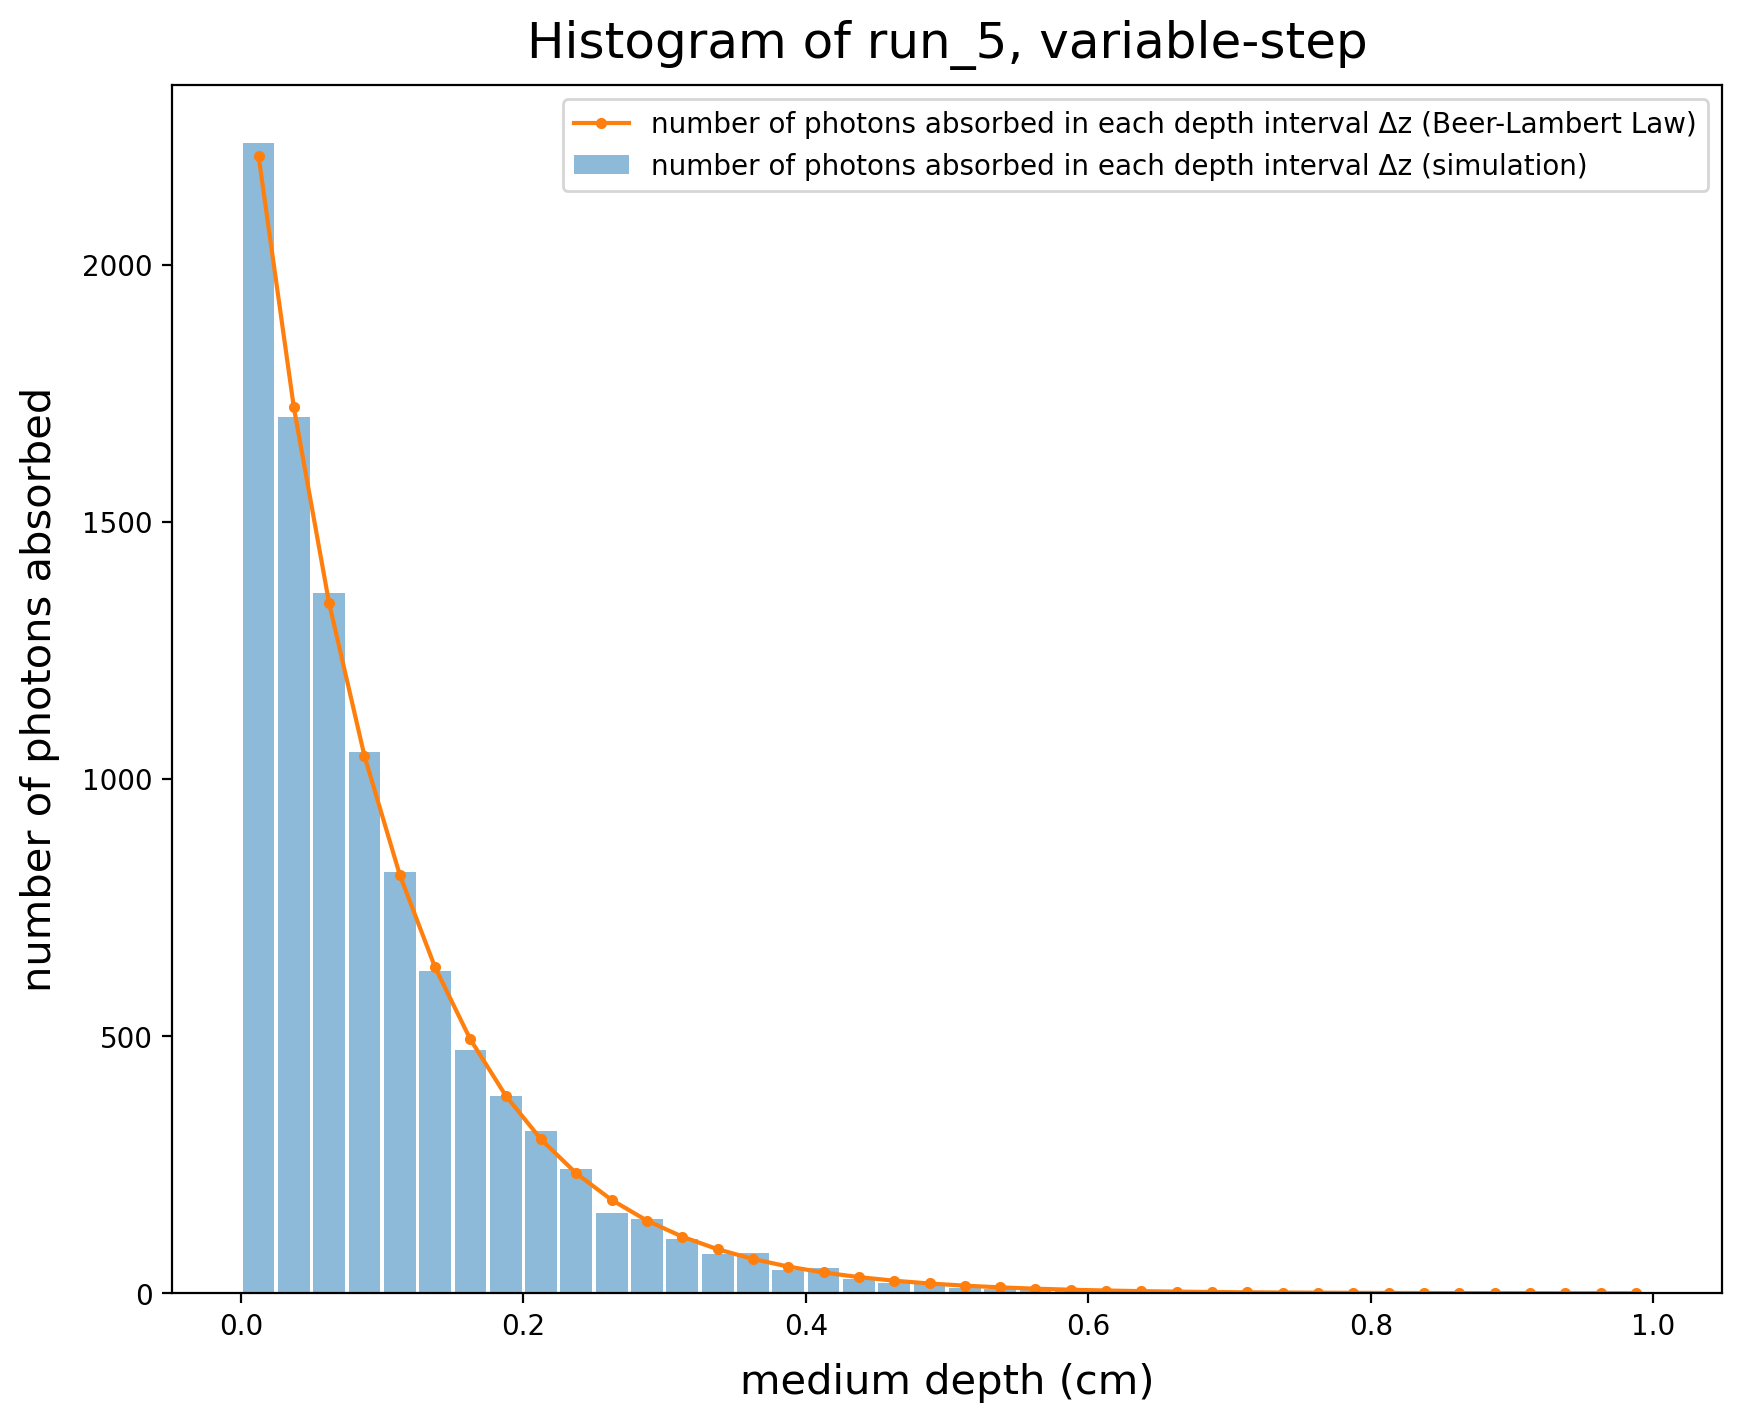

In [5]:
for run_th in range(run_times):
    # initialize the all photons (one random number represents one photon)
    photons_id = np.random.uniform(size=photon_num)
    
    # sampling
    absorbed_position_recorded = -(np.log(1-photons_id)/mua)
    
    for index, position in enumerate(absorbed_position_recorded):
        if position > 0.8:
            print("id: {}, position: {}".format(index, position))

    # record the number of photons exceeding the boundary
    photon_exceed_boundary_num = np.count_nonzero(absorbed_position_recorded>=medium_thickness)

    # delete the photon which travel outside the boundary
    absorbed_position_recorded = absorbed_position_recorded[absorbed_position_recorded<medium_thickness]

    # plot the graph
    plt.figure(dpi=200, figsize=(10, 8))
    plt.hist(absorbed_position_recorded, 
             bins=np.linspace(0, medium_thickness, num=int(medium_thickness/delta_z)+1), 
             rwidth=0.9, 
             alpha=0.5,
             label="number of photons absorbed in each depth interval \u0394z (simulation)")
    
    plt.plot(x_data, y_data, marker=".", 
             label="number of photons absorbed in each depth interval \u0394z (Beer-Lambert Law)")
    
    plt.xlabel("medium depth (cm)", fontsize=15, labelpad = 8)
    plt.ylabel("number of photons absorbed", fontsize=15, labelpad = 8)
    if photon_exceed_boundary_num > 0:
        plt.text(0.45, 1900, "{} photon(s) exceeded the boundary.".format(photon_exceed_boundary_num), fontsize=15)
    plt.legend(fontsize="medium")
    title = "Histogram of run_{}, variable-step".format(run_th+1)
    plt.title(title, fontsize=18, pad=10)
    plt.savefig("{}.png".format(title))
    plt.show()

In [7]:
def absorb_pdf(x):
    y = mua*np.exp(-mua*x)
    return y
def absorb_cdf(x):
    y = 1 - np.exp(-mua*x)
    return y

In [10]:
x = np.linspace(0, 1, num=41)
y1 = absorb_pdf(x)
y2 = absorb_cdf(x)

Text(0.5, 1.0, 'p.d.f.')

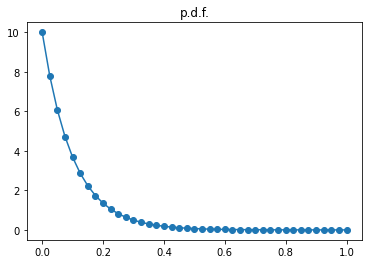

In [17]:
plt.plot(x, y1, '-o')
plt.title("p.d.f.")

Text(0.5, 1.0, 'c.d.f.')

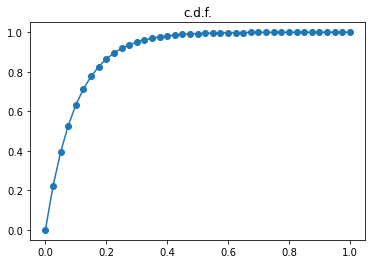

In [18]:
plt.plot(x, y2, '-o')
plt.title("c.d.f.")

In [20]:
for i in np.diff(y2):
    print(i)

0.22119921692859512
0.17227012335877145
0.13416410697161885
0.10448711156957224
0.08137464431125219
0.06337463671176036
0.049356216697984734
0.038438660213832354
0.029936058674748356
0.023314225937965505
0.01815713741719127
0.014140792838843619
0.011012860536141922
0.00857682440940355
0.006679637566309404
0.0052021069672748554
0.004051404979734996
0.003155237370756958
0.0024573013351216755
0.001913748204035115
0.0014904285999041145
0.0011607469607173293
0.0009039906419543442
0.000704028619843311
0.000548298040438655
0.000427014943250148
0.0003325595721863639
0.0002589976552367368
0.00020170757671189588
0.00015709001869479433
0.00012234182957204798
9.527991267321845e-05
7.420407060088063e-05
5.7790188290995914e-05
4.500704389487353e-05
3.5051521029116905e-05
2.729815202529018e-05
2.1259822173713694e-05
1.6557166156783154e-05
1.2894733968371597e-05


In [26]:
for idx, value in enumerate(np.diff(y2)):
    print(value / (1 - np.sum(np.diff(y2)[:idx])))

0.22119921692859512
0.22119921692859515
0.22119921692859534
0.2211992169285949
0.22119921692859504
0.2211992169285954
0.22119921692859532
0.22119921692859476
0.22119921692859512
0.22119921692859476
0.2211992169285956
0.22119921692859498
0.22119921692859487
0.22119921692859607
0.22119921692859568
0.22119921692859235
0.22119921692859854
0.22119921692859626
0.22119921692859623
0.22119921692859024
0.22119921692859953
0.2211992169285984
0.2211992169285834
0.22119921692859443
0.22119921692859587
0.2211992169285995
0.22119921692857222
0.22119921692865557
0.22119921692852745
0.22119921692869743
0.22119921692843814
0.22119921692867012
0.22119921692870045
0.22119921692851702
0.22119921692850458
0.22119921692885944
0.22119921692869238
0.2211992169288807
0.2211992169281083
0.22119921692840766


In [25]:
np.sum(np.diff(y2)[:1])

0.22119921692859512